### EDA on Home Loan Dataset

**Task 1.1: Load the Home dataset into a Pandas DataFrame**

In [1]:
# import all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [2]:
# # Looping to check the dataset for the number of outliers
# # Using IQR method (numerical dataset)
# outliers_cols = []
# for i in num_cols:
#     print(f"\n Analyzing the numerical columns - {i}")

#     # Calculating the outlier boundaries using IQR
#     q1 = df_train[i].quantile(0.25)
#     q3 = df_train[i].quantile(0.75)
#     iqr = q3 - q1

#     # Defining the bounds using interquartile range
#     lower = q1 - 1.5 * iqr
#     upper = q3 + 1.5 * iqr

#     # Checking the outliers
#     upper_outliers = (loan_train_data[i] > upper)
#     lower_outliers = (loan_train_data[i] < lower)

#     # Checking the number of outliers
#     tot_outliers = ((upper_outliers) | (lower_outliers)).sum()

#     # display the output
#     print(f"The number of outliers for {i} is {tot_outliers}")


#     # SHowing a sample of the outliers
#     if tot_outliers > 0:
#         outliers_cols.append(i)


In [3]:
# # Handling the outliers using iqr
# def handling_outlier(data, i):
#     q1 = loan_train_data[i].quantile(0.25)
#     q3 = loan_train_data[i].quantile(0.75)
#     iqr = q3 - q1
#     lower = q1 - 1.5 * iqr
#     upper = q3 + 1.5 * iqr
#     data.loc[:, i] = np.where((data.loc[:, i] < lower) | (data.loc[:, i] > upper), data[i].clip(lower=lower, upper = upper).astype(data[i].dtype), data[i])
#     return data

# for i in outliers_cols:
#     df_train = handling_outlier(loan_train_data, i)


### Phase 2: Exploratory Data Analysis (EDA)



In [4]:
df_train = pd.read_csv('cleaned_home_data.csv')

In [5]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [6]:
df_train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [20]:
df_train.set_index('Loan_ID', inplace=True)

In [21]:
# Categorical columns
cat_cols = [x for x in df_train.columns if df_train[x].dtype not in ["int64", "float64"]]
cat_cols.append("Loan_Amount_Term")
cat_cols.append("Credit_History")

In [22]:
# Extract the columns with numerical values
num_col = [x for x in df_train.columns if x not in cat_cols]

Task 2.1: Conduct descriptive statistics to summarize the key characteristics of the data.

In [23]:
# Define a function to check the statistical summary
def univariate_numerical_eda(df, column):
    """
    Performing univariate EDA on each numerical columns.
    Display the statistical summary skewness, kurtosis, histogram, KDE and boxplot
    """
    print(f"Feature: {column}")
    print("-" * 40)
    print(df_train[column].describe().to_frame())
    print(f"Skewness: {df_train[column].skew():.3f}")
    print(f"Kurtosis: {df_train[column].kurt():.3f}")

    plt.figure(figsize=(12,4))

    # Histogram + KDE
    plt.subplot(1,2,1)
    sns.histplot(df[column], kde=True, bins=30, color='orange')
    plt.title(f"\n Distribution of {column}", fontsize=13)
    plt.xlabel(column)
    plt.ylabel("Frequency")

    # Box Plot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[column], color='orange')
    plt.title(f"\n Boxplot of {column}", fontsize=13)

    plt.tight_layout()
    plt.show()

    # Transformation
    if abs(df[column].skew()) > 1:
        print(f"\n {column} is highly skewed, Consider log or Box-Cox transformation")
    elif abs(df[column].skew()) > 0.5:
        print(f"\n{column} is moderately skewed")
    else:
        print(f"{column} is fairly symmetric")


**Task 2.2: Visualize distributions of numerical features using histograms and box plots.**

Feature: ApplicantIncome
----------------------------------------
       ApplicantIncome
count       614.000000
mean       5403.459283
std        6109.041673
min         150.000000
25%        2877.500000
50%        3812.500000
75%        5795.000000
max       81000.000000
Skewness: 6.540
Kurtosis: 60.541


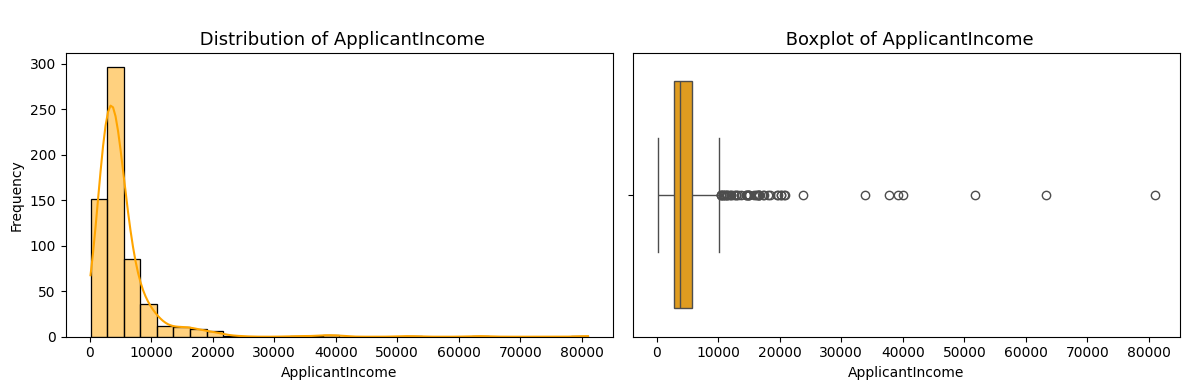


 ApplicantIncome is highly skewed, Consider log or Box-Cox transformation


In [24]:
# Histogram + boxplot for Applicant income
univariate_numerical_eda(df_train, "ApplicantIncome")

Feature: Dependents
----------------------------------------
       Dependents
count  614.000000
mean     0.744300
std      1.009623
min      0.000000
25%      0.000000
50%      0.000000
75%      1.000000
max      3.000000
Skewness: 1.016
Kurtosis: -0.347


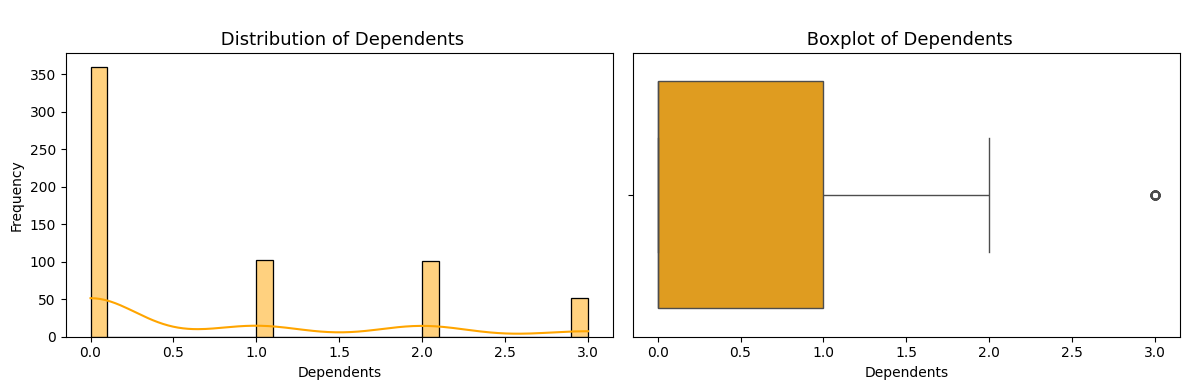


 Dependents is highly skewed, Consider log or Box-Cox transformation
Feature: ApplicantIncome
----------------------------------------
       ApplicantIncome
count       614.000000
mean       5403.459283
std        6109.041673
min         150.000000
25%        2877.500000
50%        3812.500000
75%        5795.000000
max       81000.000000
Skewness: 6.540
Kurtosis: 60.541


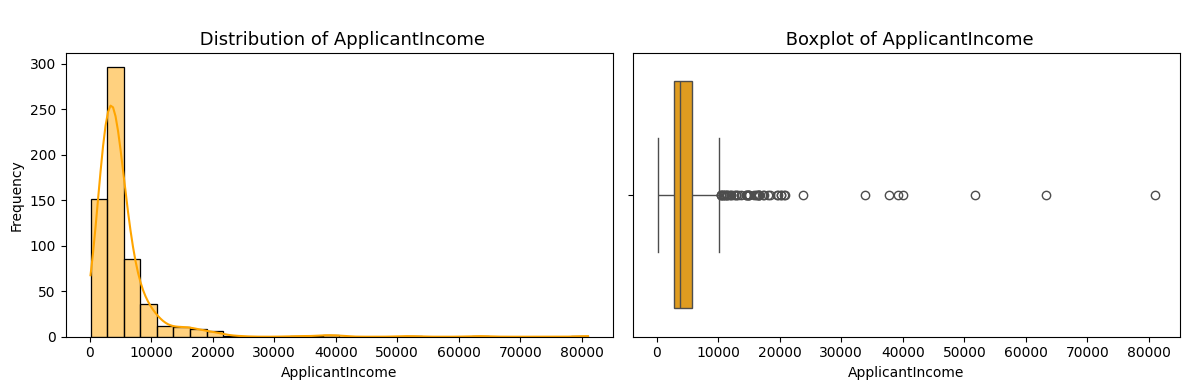


 ApplicantIncome is highly skewed, Consider log or Box-Cox transformation
Feature: CoapplicantIncome
----------------------------------------
       CoapplicantIncome
count         614.000000
mean         1621.245798
std          2926.248369
min             0.000000
25%             0.000000
50%          1188.500000
75%          2297.250000
max         41667.000000
Skewness: 7.492
Kurtosis: 84.956


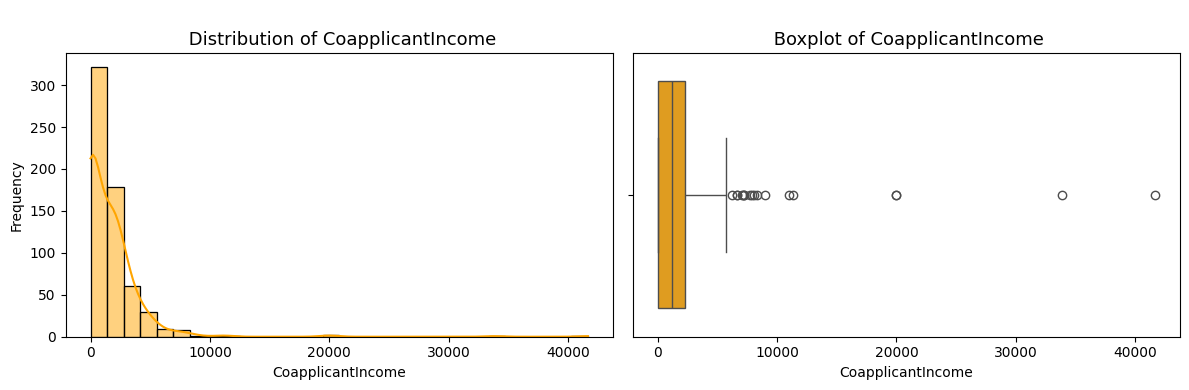


 CoapplicantIncome is highly skewed, Consider log or Box-Cox transformation
Feature: LoanAmount
----------------------------------------
       LoanAmount
count  614.000000
mean   145.752443
std     84.107233
min      9.000000
25%    100.250000
50%    128.000000
75%    164.750000
max    700.000000
Skewness: 2.743
Kurtosis: 10.937


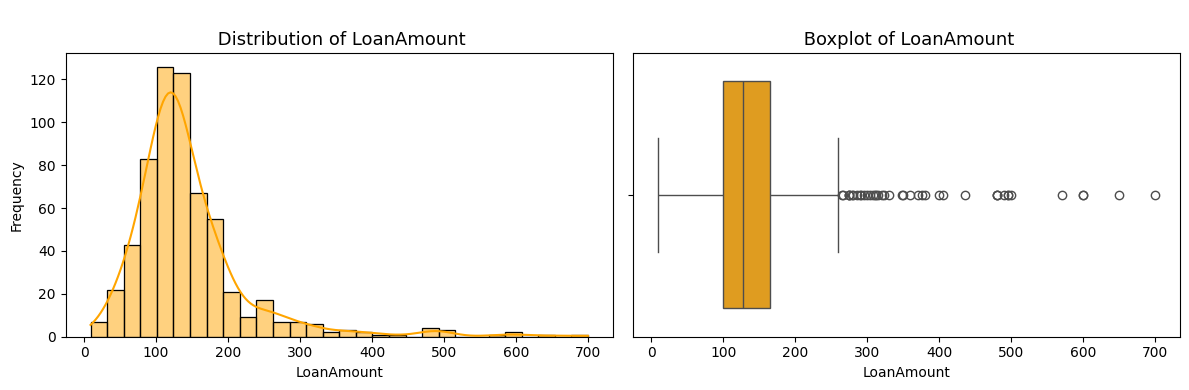


 LoanAmount is highly skewed, Consider log or Box-Cox transformation
Feature: Loan_Status
----------------------------------------
       Loan_Status
count   614.000000
mean      0.687296
std       0.463973
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Skewness: -0.810
Kurtosis: -1.348


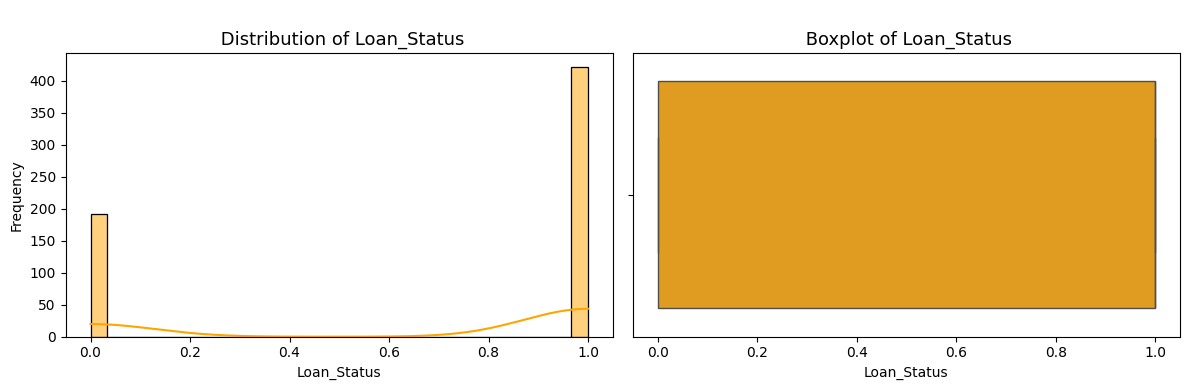


Loan_Status is moderately skewed


In [15]:
# Looping to check the summary for the other numerical dataset
for col in num_col:
    univariate_numerical_eda(df_train, col)

In [116]:
# # Converting the Loan Amount type back toInt 64
# df_train["Loan_Amount_Term"] = df_train["Loan_Amount_Term"].astype(float)
# df_train["Loan_Amount_Term"] 

In [117]:
# # Calculating the years of the loan amount term from the months
# df_train["Loan_Amount_Term_year"] = round((df_train["Loan_Amount_Term"] / 12) , 1)
# df_train["Loan_Amount_Term_year"].head()

**Task 2.3: Analyze categorical features (e.g., education, employment status, property area) using bar charts and pie charts.**

****

In [25]:
def univariate_categorical_eda(df, column):
    """
    Performs univariate EDA on categorical columns
    Displays frequency table, proportion, bar chart and pie chart
    """

    print(f"Feature: {column}")
    print("="*40)

    # Frequency +proportion
    freq = df[column].value_counts()
    prop = df[column].value_counts(normalize=True)* 100
    summary = pd.DataFrame({"Count": freq, "Percentage": prop.round(2)})
    print(summary)
    print()

    plt.figure(figsize=(8,5))
    # Visualization (Barchart)
    plt.subplot(1,2,1)
    ax = sns.countplot(x=column, data=df_train, palette="Set3", order=freq.index, color="orange")
    plt.title(f"Distribution Barchart of {column}", fontsize=13)
    plt.xlabel(column)
    plt.ylabel("Count")

    # Visualization (piechart)
    plt.subplot(1,2,2)
    df_train[col].value_counts().plot(kind="pie", autopct="%1.1f%%", startangle=90)
    plt.title(f"Distribution Piechart of {column}", fontsize=13)

    # Annotate each bar with percentage
    total = len(df[column])
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2, height + 1, f"{(height/total)*100:.1f}%", ha="center")

    plt.tight_layout()
    plt.show()

Feature: Gender
        Count  Percentage
Gender                   
Male      502       81.76
Female    112       18.24



C:\Users\kanyi\AppData\Local\Temp\ipykernel_32120\3694337400.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df_train, palette="Set3", order=freq.index, color="orange")


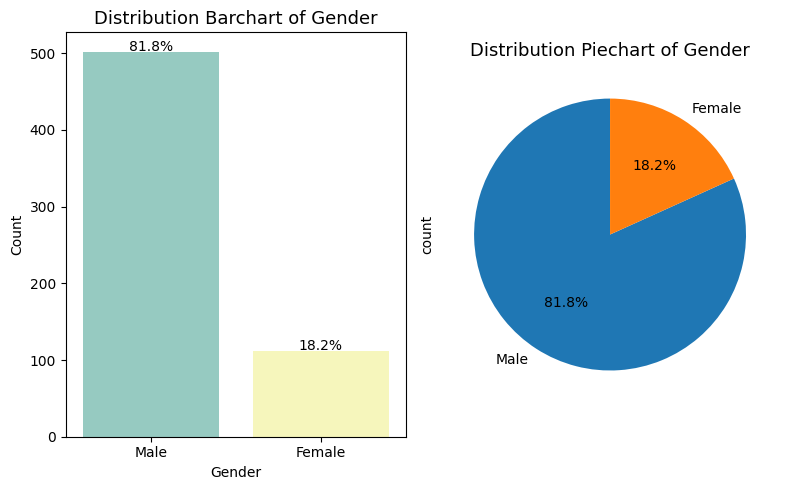

Feature: Married
         Count  Percentage
Married                   
Yes        401       65.31
No         213       34.69



C:\Users\kanyi\AppData\Local\Temp\ipykernel_32120\3694337400.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df_train, palette="Set3", order=freq.index, color="orange")


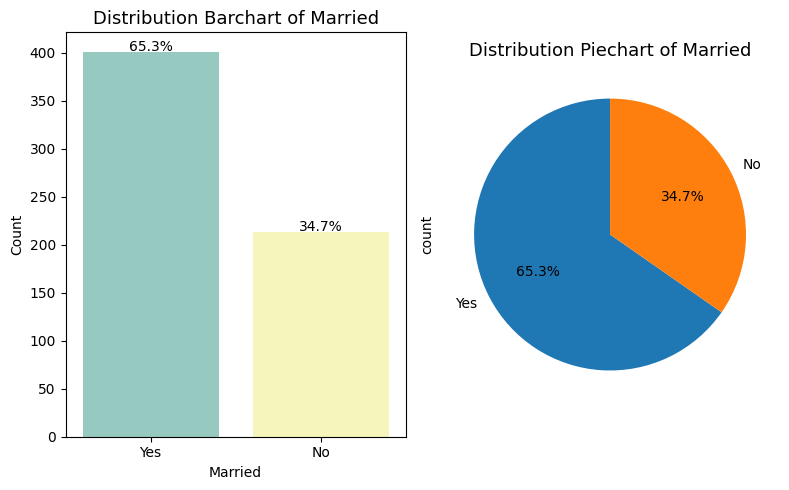

Feature: Education
              Count  Percentage
Education                      
Graduate        480       78.18
Not Graduate    134       21.82



C:\Users\kanyi\AppData\Local\Temp\ipykernel_32120\3694337400.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df_train, palette="Set3", order=freq.index, color="orange")


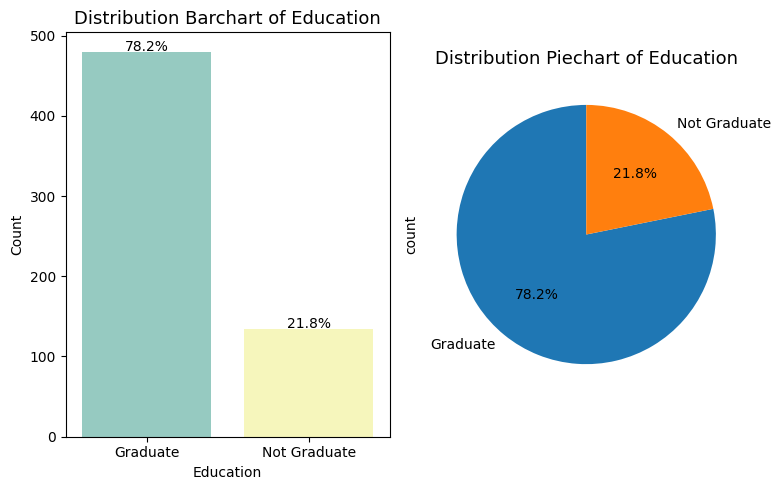

Feature: Self_Employed
               Count  Percentage
Self_Employed                   
No               532       86.64
Yes               82       13.36



C:\Users\kanyi\AppData\Local\Temp\ipykernel_32120\3694337400.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df_train, palette="Set3", order=freq.index, color="orange")


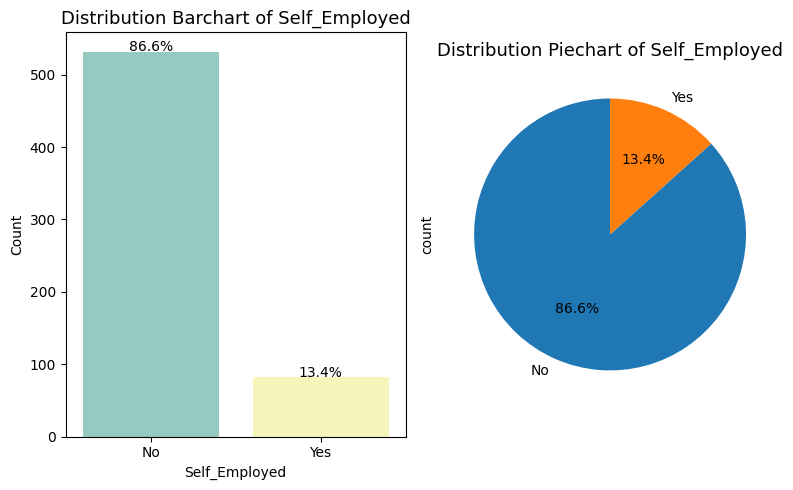

Feature: Property_Area
               Count  Percentage
Property_Area                   
Semiurban        233       37.95
Urban            202       32.90
Rural            179       29.15



C:\Users\kanyi\AppData\Local\Temp\ipykernel_32120\3694337400.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df_train, palette="Set3", order=freq.index, color="orange")


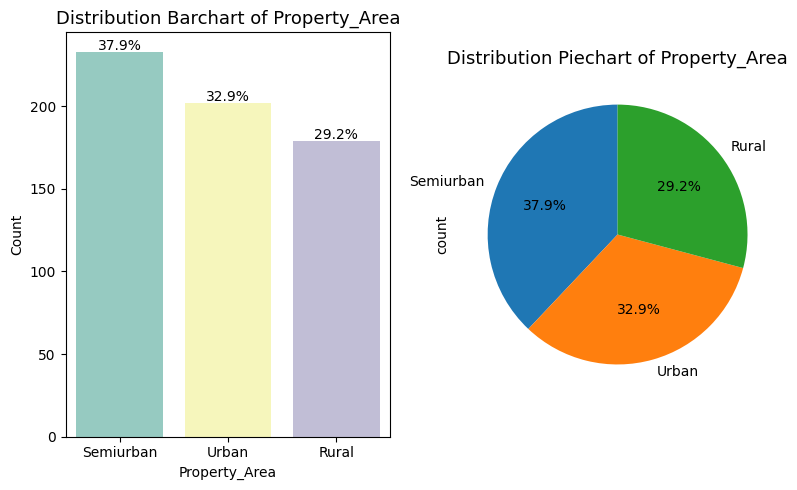

Feature: Loan_Amount_Term
                  Count  Percentage
Loan_Amount_Term                   
360.0               526       85.67
180.0                44        7.17
480.0                15        2.44
300.0                13        2.12
84.0                  4        0.65
240.0                 4        0.65
120.0                 3        0.49
60.0                  2        0.33
36.0                  2        0.33
12.0                  1        0.16



C:\Users\kanyi\AppData\Local\Temp\ipykernel_32120\3694337400.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df_train, palette="Set3", order=freq.index, color="orange")


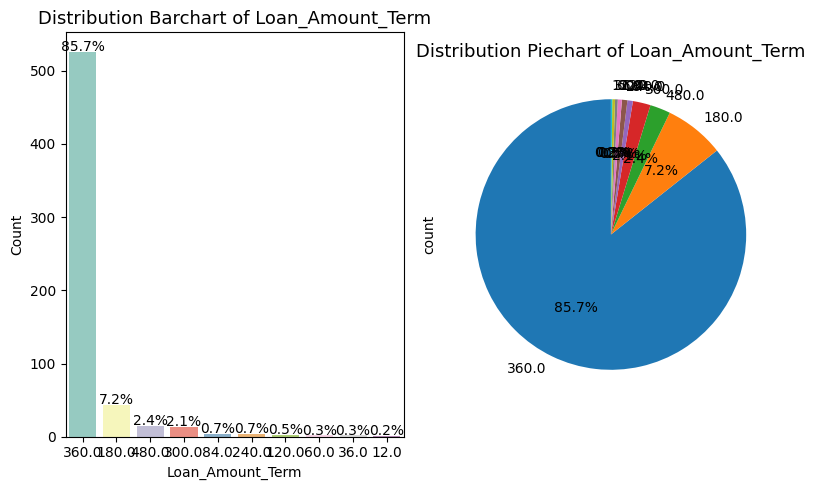

Feature: Credit_History
                Count  Percentage
Credit_History                   
1.0               525        85.5
0.0                89        14.5



C:\Users\kanyi\AppData\Local\Temp\ipykernel_32120\3694337400.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df_train, palette="Set3", order=freq.index, color="orange")


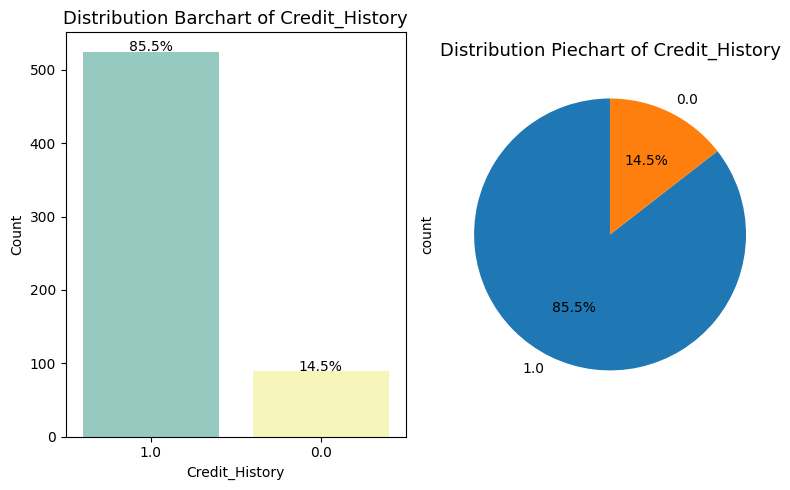

In [26]:
for col in cat_cols:
    univariate_categorical_eda(df_train, col)

**Observations**
- The approved home loans are over twice of the loans declined.
- The target data is imbalanced

### Bivariate Analysis

**Task 2.4: Examine relationships between features and the target variable (loan approval status) using scatter plots, correlation matrices, and cross-tabulations.**

In [135]:
# Check the data types of the columns
df_train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents             int64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History        object
Property_Area         object
Loan_Status            int64
dtype: object

In [136]:
df_train.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,good,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,good,Rural,0


In [137]:
# Lets find the numerical features
num_features = df_train.select_dtypes(include=['Int64', 'Float64']).columns

# Convert to dataframe
num_features = pd.DataFrame(df_train[num_features])
num_features.head(2)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
0,0,5849,0.0,128.0,360.0,1
1,1,4583,1508.0,128.0,360.0,0


In [139]:
df_train.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

**Correlation with target**

In [125]:
def correlation_with_target(df_train, target_col, figsize=(8,5)):
    """
    Plots a heatmap showing the correlation of each numeric feature against target_col.
    Returns a Series of correlations (sorted by absolute magnitude)
    """

    # Compute correlations of every numeric column with the target
    corrs = df_train[num_cols].corrwith(df_train['Loan_Status'])

    corrs_df = corrs.to_frame(name='corr').T  # shape(1,n)

    plt.figure(figsize=figsize)
    sns.heatmap(
        corrs_df,
        annot=True,
        fmt=".3f",
        cmap="coolwarm",
        center = 0,
        vmin = -1,
        vmax = 1,
        cbar_kws = {"orientation": "vertical", "shrink": 0.7}
    )

    plt.xticks(rotation=0, ha='right')
    plt.yticks([0], [target_col], rotation=0)
    plt.title(f"Correlation of numeric features with {target_col}", fontsize=12)
    plt.tight_layout()
    plt.show()

    # Return sorted correlation for downstream use
    return corrs.reindex(corrs.abs().sort_values(ascending=False).index)

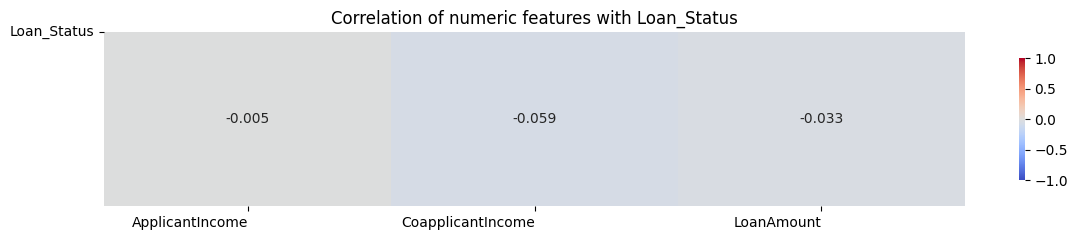

CoapplicantIncome   -0.059187
LoanAmount          -0.033214
ApplicantIncome     -0.004710
dtype: float64

In [126]:
corr_series = correlation_with_target(df_train, 'Loan_Status', figsize=(12, 2.5))
(corr_series)

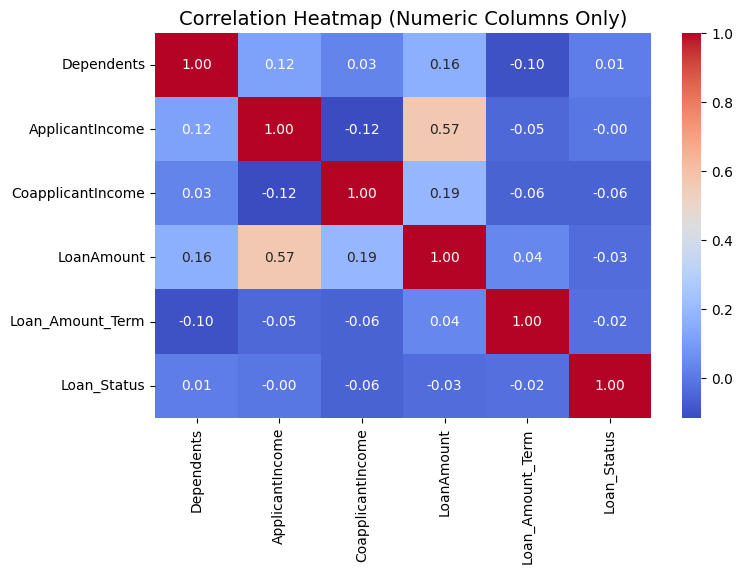

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = df_train.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numeric Columns Only)', fontsize=14)
plt.show()

Observations

- The dataset is generally clean and well-structured, with minimal missing values across most variables.

- Missing data were handled appropriately using mode and median imputations, depending on variable type and context.

- Outliers detected in ApplicantIncome, CoapplicantIncome, and LoanAmount were treated using IQR-based clipping to preserve all records while minimizing skew.

- Numeric variables such as income and loan amount show right-skewed distributions, indicating a few high-value applicants.

- Categorical variables exhibit dominant classes, such as more males, married applicants, and graduates.

- Credit_History emerged as the strongest predictor of loan approval, followed by income-related variables.

- Relationships between loan amount, income, and approval status suggest financial stability and credit record are key approval factors.

- The dataset is now clean, consistent, and ready for preprocessing, feature engineering, and subsequent modeling.